In [95]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plotly.offline as py
import plotly.figure_factory as ff
import nltk
import re
import string
from sklearn.metrics import confusion_matrix


# 1-Data

In [2]:
data = pd.read_csv("spam.csv",  encoding="ISO-8859-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Let's drop unnecessary unnamed rows.

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

### Will change columns name

In [6]:
data.columns=['label','text']

In [7]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

### As we see, there is a some punctutaion in dataset. So, we need to deal with them.

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuation(text):
    new_text=''.join([char for char in text if char not in string.punctuation])
    return new_text

In [11]:
data['new_text']=data['text'].apply(lambda row : remove_punctuation(row))

In [12]:
data.head()

,label,text,new_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [13]:
data.new_text

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                  Will Ì b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: new_text, Length: 5572, dtype: object

### It looks like punctuations has gone now

## Now, we'll split each words into tokens so let's create another function for it

In [14]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens 

In [15]:
data['tokenized_text']=data['new_text'].apply(lambda row : tokenize(row.lower()))
data.head()

,label,text,new_text,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


## So, we'll remove stopwords because they doesn't make much meaning.

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/han/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

### So, let's add another function to remove stopwords on data.

In [18]:
def remove_stopwords(text):
    clean_text=[word for word in text if word not in stopwords]
    return clean_text 

In [19]:
data['clean_text']=data['tokenized_text'].apply(lambda row : remove_stopwords(row))
data.head()

,label,text,new_text,tokenized_text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


### Last, preprocessing step is stemming.

In [20]:
#Stemmers remove morphological affixes from words, leaving only the word stem.
ps = nltk.PorterStemmer() #ayiklama - sikilama (like likely liked)

In [21]:
def stemming(tokenized_text):
    stemmed_text=[ps.stem(word) for word in tokenized_text]
    return stemmed_text

In [22]:
data['stemmed_text']=data.clean_text.apply(lambda row : stemming(row))
data[['text','stemmed_text']].head()

,text,stemmed_text
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, live, around, tho..."


### We'll merge the stemmed words to create final text

In [23]:
def get_final_text(stemmed_text):
    final_text=" ".join([word for word in stemmed_text])
    return final_text

In [24]:
data['final_text']=data.stemmed_text.apply(lambda row : get_final_text(row))
data.head()

,label,text,new_text,tokenized_text,clean_text,stemmed_text,final_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


# 2.EDA

In [25]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

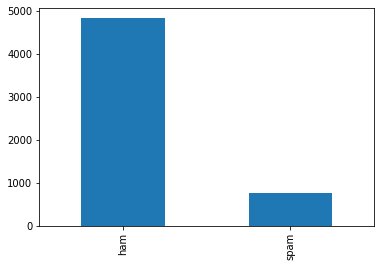

In [26]:
data.label.value_counts().plot.bar();

### Let's add numerical value for labels.

In [27]:
data['spam'] = data['label'].map( {'spam': 1, 'ham': 0} ).astype(int)
data.head()

,label,text,new_text,tokenized_text,clean_text,stemmed_text,final_text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...,1
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though,0


In [28]:
data['length'] = data['text'].apply(len) #Will add length of the message
data.head()

,label,text,new_text,tokenized_text,clean_text,stemmed_text,final_text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...,0,111
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...,1,155
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though,0,61


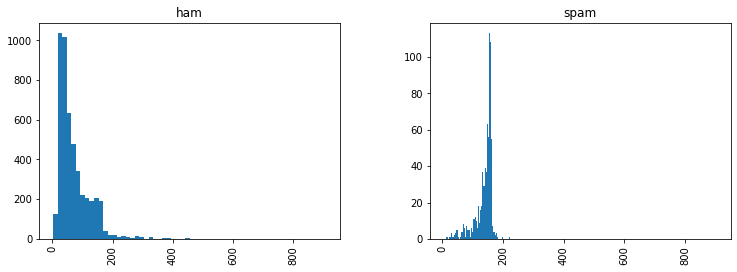

In [29]:
data.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);
#Spam messages usually are longer than ham messages

## It looks like spam messages generally longer than ham.

In [30]:
data_ham  = data[data['spam'] == 0].copy()
data_spam = data[data['spam'] == 1].copy()

In [31]:
import wordcloud

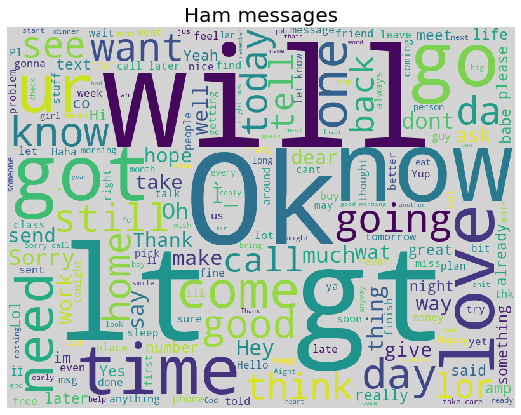

In [32]:
text = ' '.join(data_ham['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgray',colormap='viridis', width=800, height=600).generate(text)

plt.figure(figsize=(10,7), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Ham messages', fontsize=20 )
plt.show()

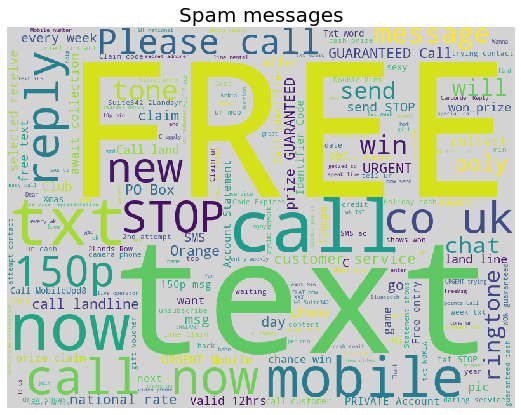

In [33]:
text = ' '.join(data_spam['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgray',colormap='viridis', width=800, height=600).generate(text)

plt.figure(figsize=(10,7), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Spam messages', fontsize=20 )
plt.show()

# Let's see top used number of words in ham and spam messages in a bar graph

# 3-Preprocessing

In [34]:
from collections import Counter

In [35]:
from nltk.corpus import stopwords
stopwords.words("english")[100:110]

['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']

In [36]:
def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords

In [37]:
data['text'].apply(remove_punctuation_and_stopwords).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [38]:
data_ham.loc[:, 'text'] = data_ham['text'].apply(remove_punctuation_and_stopwords)
words_data_ham = data_ham['text'].tolist()
data_spam.loc[:, 'text'] = data_spam['text'].apply(remove_punctuation_and_stopwords)
words_data_spam = data_spam['text'].tolist()

In [39]:
list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [40]:
list_spam_words = []
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [41]:
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
df_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

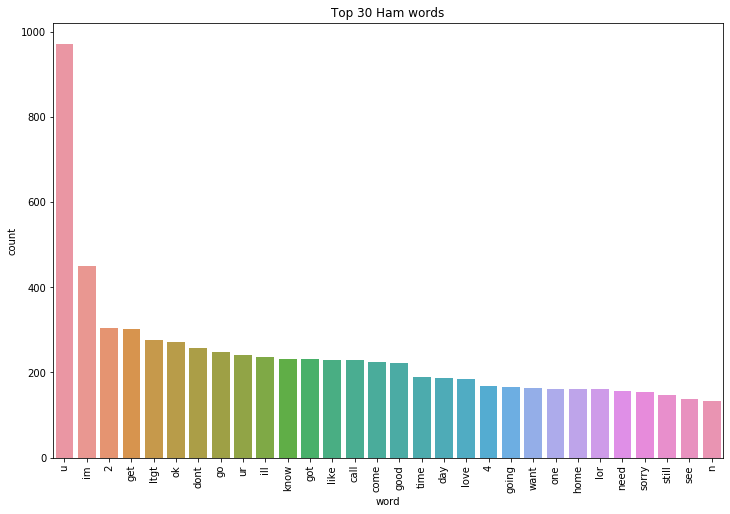

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='word', y='count', 
            data=df_hamwords_top30, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

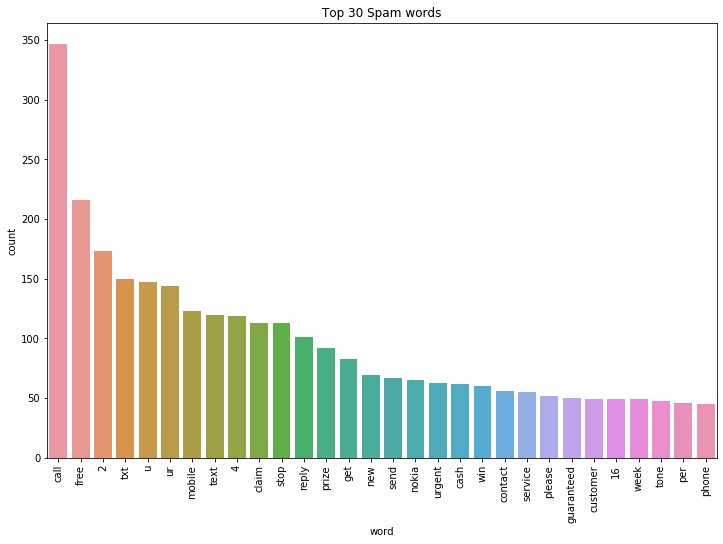

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='word', y='count', 
            data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

## Now it's time to extract numerical features from text. We will use:
### 1-Tokenization (giving an integer id for each possible token)
### 2-Vectorization (counting the occurrences of tokens in each document.)
### 3-TF-IDF (normalizing and weighting)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer ##Convert a collection of text documents to a matrix of token counts

bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(data['text'])

In [45]:
print(len(bow_transformer.vocabulary_)) #Bow transformer counted 9431 different words.

9431


## Examples of Spam and Ham Messages

In [46]:
sample_spam = data['text'][318]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Free! Call The Mobile Update Co FREE on 08002986906
  (0, 58)	1
  (0, 322)	1
  (0, 1906)	1
  (0, 1942)	1
  (0, 2234)	1
  (0, 2268)	1
  (0, 2644)	1
  (0, 3120)	1
  (0, 3539)	2
  (0, 4859)	1
  (0, 5470)	3
  (0, 8621)	2


In [47]:
rows, cols = bow_sample_spam.nonzero()
for col in cols: 
    print(bow_transformer.get_feature_names()[col])

08002986906
11mths
call
camera
co
colour
december
entitled
free
latest
mobile
update


In [48]:
sample_ham = data['text'][214]
bow_sample_ham = bow_transformer.transform([sample_ham])
print(sample_ham)
print(bow_sample_ham)


Sounds great! Are you home now?
  (0, 3845)	1
  (0, 4142)	1
  (0, 7617)	1


In [49]:
rows, cols = bow_sample_ham.nonzero()
for col in cols: 
    print(bow_transformer.get_feature_names()[col])

great
home
sounds


# Let's apply bow transformer to all messages

In [50]:
bow_data = bow_transformer.transform(data['text'])

In [51]:
bow_data.shape

(5572, 9431)

## TFID Transformer

longer documents have higher average count values
than shorter documents,To avoid these, we will divide the number of occurrences of each word in a document
by the total number of words in the document

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bow_data)

In [53]:
tfidf_sample_ham = tfidf_transformer.transform(bow_sample_ham)
print(tfidf_sample_ham)

  (0, 7617)	0.7100722079083384
  (0, 4142)	0.4750506792615576
  (0, 3845)	0.5197348474840899


In [54]:
tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam)
print(tfidf_sample_spam)

  (0, 8621)	0.45167028025573225
  (0, 5470)	0.4864729943312718
  (0, 4859)	0.20240584244555046
  (0, 3539)	0.28457938563946367
  (0, 3120)	0.25109198188382803
  (0, 2644)	0.2647972424462158
  (0, 2268)	0.22087974748625086
  (0, 2234)	0.2550732053262879
  (0, 1942)	0.20717448692386312
  (0, 1906)	0.11294899591557554
  (0, 322)	0.24753065615887107
  (0, 58)	0.27095995384118676


In [55]:
data_tfidf = tfidf_transformer.transform(bow_data)


In [56]:
data_tfidf

<5572x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [57]:
np.shape(data_tfidf)

(5572, 9431)

In [58]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, data["spam"], test_size=0.3, random_state=5)

In [59]:
data_tfidf_train


<3900x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 35125 stored elements in Compressed Sparse Row format>

In [60]:
data_tfidf_test

<1672x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 14647 stored elements in Compressed Sparse Row format>

# 4-Classification Algorithms

### Split Train-Test

In [83]:
#for text data
from sklearn.model_selection import train_test_split

sms_train, sms_test, label_train, label_test = \
    train_test_split(data["text"], data["spam"], test_size=0.3, random_state=5)

### Naive Bayes

In [84]:
data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

In [85]:
spam_detect_model = MultinomialNB().fit(data_tfidf_train, label_train)
pred_test_MNB = spam_detect_model.predict(data_tfidf_test)
acc_MNB = accuracy_score(label_test, pred_test_MNB)
print(acc_MNB) #96.5% accuracy(MultinomialNB)

0.965311004784689


### KNN

In [112]:
pipe_KNN = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_KNN' , KNeighborsClassifier() )
                    ])

parameters_KNN = {'clf_KNN__n_neighbors': (8,15,20), }

grid_KNN = GridSearchCV(pipe_KNN, parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)

grid_KNN.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7f4c87fd2050>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_rang

In [113]:
print(grid_KNN.best_params_)
print(grid_KNN.best_score_) #93% accuracy(K-Nearest Neighbor)

{'clf_KNN__n_neighbors': 15}
0.936923076923077


### SVC

In [67]:
pipe_SVC = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SVC' , SVC(gamma='auto', C=1000)),
                    ])


parameters_SVC = dict(tfidf=[None, TfidfTransformer()],
                      clf_SVC__C=[500, 1000,1500]
                      )
grid_SVC = GridSearchCV(pipe_SVC, parameters_SVC, 
                        cv=5, n_jobs=-1, verbose=1)

grid_SVC.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7f4c87fd2050>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_rang

In [68]:
print(grid_SVC.best_params_)
print(grid_SVC.best_score_)

{'clf_SVC__C': 1500, 'tfidf': None}
0.9761538461538461


### GradientBoostingClassifier

In [69]:
pipe_GBC = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                      ('tfidf'   , TfidfTransformer() ),
                      ('clf_GBC' , GradientBoostingClassifier(random_state=5) ),
                    ])

parameters_GBC = { 'tfidf__use_idf': (True, False), 
                   'clf_GBC__learning_rate': (0.1, 0.2),
                   #'clf_GBC__min_samples_split': (3,5), 
                 }

grid_GBC = GridSearchCV(pipe_GBC, parameters_GBC, 
                        cv=5, n_jobs=-1, verbose=1)

grid_GBC.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7f4c87fd2050>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_rang

In [72]:
print(grid_GBC.best_params_)
print(grid_GBC.best_score_)

{'clf_GBC__learning_rate': 0.2, 'tfidf__use_idf': False}
0.9641025641025641


### XGBoost 

In [78]:
pipe_XGB = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                      ('tfidf'   , TfidfTransformer() ),
                      ('clf_XGB' , xgb.XGBClassifier(random_state=5) ),
                    ])

parameters_XGB = { 'tfidf__use_idf': (True, False), 
                   'clf_XGB__eta': (0.01, 0.02),
                   'clf_XGB__max_depth': (5,6), 
                 }

grid_XGB = GridSearchCV(pipe_XGB, parameters_XGB, 
                        cv=5, n_jobs=-1, verbose=1)

grid_XGB.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7f4c87fd2050>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_rang

In [79]:
print(grid_XGB.best_params_)
print(grid_XGB.best_score_)

{'clf_XGB__eta': 0.01, 'clf_XGB__max_depth': 5, 'tfidf__use_idf': False}
0.958974358974359


### SGD

In [96]:
pipe_SGD = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SGD' , SGDClassifier(random_state=5)),
                    ])

parameters_SGD = {
    #'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'clf_SGD__max_iter': (5,10),
    'clf_SGD__alpha': (1e-05, 1e-04),
}

grid_SGD = GridSearchCV(pipe_SGD, parameters_SGD, cv=5,
                               n_jobs=-1, verbose=1)

grid_SGD.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7f4c87fd2050>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_rang

In [97]:
print(grid_SGD.best_params_)
print(grid_SGD.best_score_)

{'clf_SGD__alpha': 0.0001, 'tfidf__use_idf': True}
0.9766666666666667


# 5-Comparison of Algorithms

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

### We will use Seaborn heat map to visualizing confusion matrix

In [119]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False)

    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [120]:
list_clf = ["MNB", "KNN", "SVC", "SGD", "GBC", "XGB"]

list_pred = [pred_test_MNB, pred_test_grid_KNN, 
             pred_test_grid_SVC, pred_test_grid_SGD,
             pred_test_grid_GBC, pred_test_grid_XGB]

dict_pred = dict(zip(list_clf, list_pred))

In [148]:
def plot_all_confusion_matrices(y_true, dict_all_pred, str_title):
    
    list_classifiers = list(dict_all_pred.keys())
    plt.figure(figsize=(15,10))
    plt.suptitle(str_title, fontsize=20, fontweight='bold')
    n=231

    for clf in list_classifiers : 
        plt.subplot(n)
        plot_confusion_matrix(y_true, dict_all_pred[clf])
        plt.title(clf, fontweight='bold')
        n+=1

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

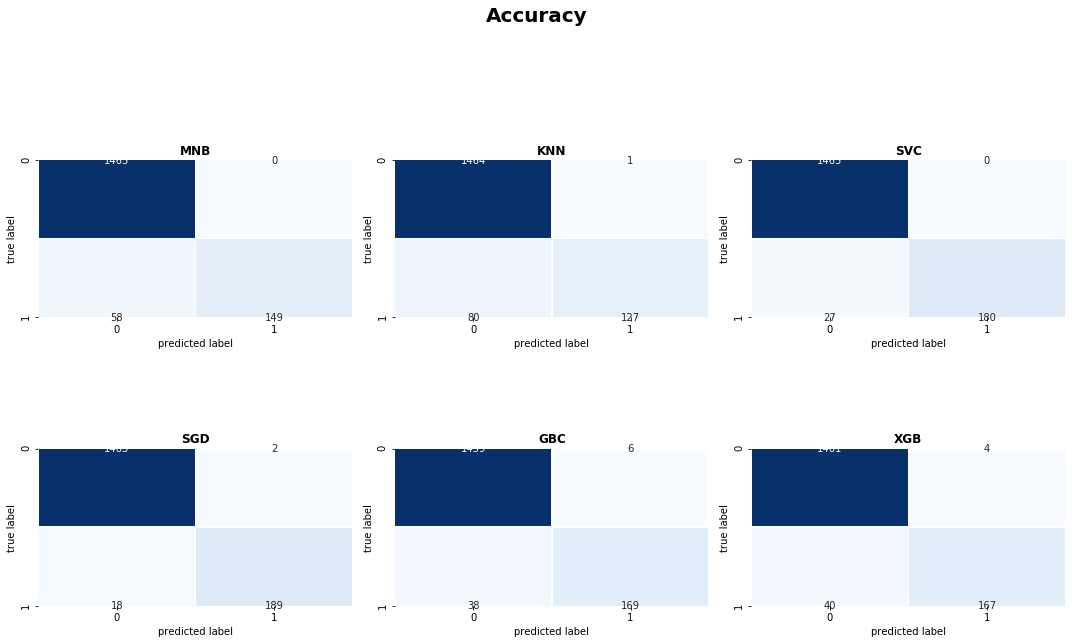

In [149]:
plot_all_confusion_matrices(label_test, dict_pred, "Accuracy")

## Accuracy Score

In [150]:
dict_acc = {}
for clf in list_clf :
    dict_acc[clf] = accuracy_score(label_test, dict_pred[clf])
for clf in list_clf :
    print(clf, " " , dict_acc[clf])
    
#(TP + TN) / (TP + TN + FP + FN)

MNB   0.965311004784689
KNN   0.9515550239234449
SVC   0.9838516746411483
SGD   0.9880382775119617
GBC   0.9736842105263158
XGB   0.9736842105263158


## Precision Score

In [154]:
for clf in list_clf :
    print(clf, " ", precision_score(label_test, dict_pred[clf]))
print("----------------------------")
for clf in list_clf :
    print(clf, " ", precision_score(label_test, dict_pred[clf], average=None, labels=[0,1]))

#TP / (TP + FP)

MNB   1.0
KNN   0.9921875
SVC   1.0
SGD   0.9895287958115183
GBC   0.9657142857142857
XGB   0.9766081871345029
----------------------------
MNB   [0.96191727 1.        ]
KNN   [0.94818653 0.9921875 ]
SVC   [0.98190349 1.        ]
SGD   [0.98784605 0.9895288 ]
GBC   [0.9746159  0.96571429]
XGB   [0.9733511  0.97660819]


## Recall Score

In [155]:
for clf in list_clf :
    print(clf, " ", recall_score(label_test, dict_pred[clf]))
print("----------------------------")
for clf in list_clf :
    print(clf, " ", recall_score(label_test, dict_pred[clf], average=None, labels=[0,1] ))

MNB   0.7198067632850241
KNN   0.6135265700483091
SVC   0.8695652173913043
SGD   0.9130434782608695
GBC   0.8164251207729468
XGB   0.8067632850241546
----------------------------
MNB   [1.         0.71980676]
KNN   [0.99931741 0.61352657]
SVC   [1.         0.86956522]
SGD   [0.99863481 0.91304348]
GBC   [0.99590444 0.81642512]
XGB   [0.99726962 0.80676329]


## F1-Score

In [156]:
for clf in list_clf :
    print(clf, " ", f1_score(label_test, dict_pred[clf]))
print("----------------------------")
for clf in list_clf :
    print(clf, " ", f1_score(label_test, dict_pred[clf], average=None, labels=[0,1] ))

MNB   0.8370786516853932
KNN   0.7582089552238805
SVC   0.9302325581395349
SGD   0.949748743718593
GBC   0.8848167539267014
XGB   0.8835978835978836
----------------------------
MNB   [0.98058902 0.83707865]
KNN   [0.97308076 0.75820896]
SVC   [0.99086912 0.93023256]
SGD   [0.99321113 0.94974874]
GBC   [0.98514517 0.88481675]
XGB   [0.98516521 0.88359788]


## Classification Report

In [157]:
print(classification_report(label_test, pred_test_MNB))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       1.00      0.72      0.84       207

    accuracy                           0.97      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.97      0.96      1672



In [158]:
print(classification_report(label_test, pred_test_grid_KNN))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1465
           1       0.99      0.61      0.76       207

    accuracy                           0.95      1672
   macro avg       0.97      0.81      0.87      1672
weighted avg       0.95      0.95      0.95      1672



In [159]:
print(classification_report(label_test, pred_test_grid_SVC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1465
           1       1.00      0.87      0.93       207

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [160]:
print(classification_report(label_test, pred_test_grid_GBC))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1465
           1       0.97      0.82      0.88       207

    accuracy                           0.97      1672
   macro avg       0.97      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [161]:
print(classification_report(label_test, pred_test_grid_XGB))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1465
           1       0.98      0.81      0.88       207

    accuracy                           0.97      1672
   macro avg       0.97      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [162]:
print(classification_report(label_test, pred_test_grid_SGD))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1465
           1       0.99      0.91      0.95       207

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



## ROC-AUC Score

In [163]:
for clf in list_clf :
    print(clf, " ", roc_auc_score(label_test, dict_pred[clf] ))

MNB   0.8599033816425121
KNN   0.806421988095827
SVC   0.9347826086956521
SGD   0.9558391452737794
GBC   0.9061647788165076
XGB   0.9020164547987667
